Suppress TensorFlow warning.

In [1]:
%%capture
import dqn

Load the agent with the best training score.

In [2]:
import os

parent_dir = 'results'
config_file = os.path.join(parent_dir, 'config.yaml')
params = dqn.read_yaml(config_file)
agent = dqn.get_agent(params)
weights_file = dqn.get_best_weights_file(parent_dir)
print(os.path.basename(weights_file))
agent.load_weights(weights_file)

episode00900_score00250.h5


Play Lunar Lander.

In [3]:
import gym

class Renderer(gym.Wrapper):

    def __init__(self, env, font=None):
        super().__init__(env)
        self.frames = []

    def render_frame(self):
        self.frames.append(self.env.render(mode='rgb_array'))

    def step(self, action):
        self.render_frame()
        return self.env.step(action)

agent.env = Renderer(agent.env)
try:
    agent.predict(num_iterations=1,
                  max_steps=300, 
                  render=False,
                  verbose=False)
finally:
    agent.env.close()
frames = agent.env.frames

Visualize agent.


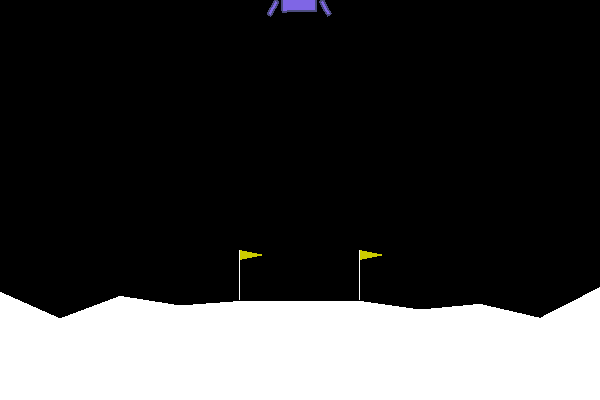

In [4]:
import io
import base64
import imageio
from IPython.display import HTML

with io.BytesIO() as buffer:
    imageio.mimwrite(buffer, frames, format='gif', fps=60)
    buffer.seek(0)
    data = buffer.read()
data = base64.b64encode(data).decode()
HTML(f'<img src="data:image/gif;base64,{data}">')